In [515]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os
import pickle


In [516]:

# Load data
data = pd.read_excel("employee_burnout_analysis-AI5.xlsx")



In [517]:
data.head(15)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29
6,fffe33003300340039003100,2008-01-02,Female,Service,No,3,6.0,7.9,0.62
7,fffe32003600320037003400,2008-10-31,Female,Service,Yes,2,4.0,4.4,0.33
8,fffe32003200300034003700,2008-12-27,Female,Service,No,3,6.0,NaN,0.56
9,fffe31003600320030003200,2008-03-09,Female,Product,No,3,6.0,NaN,0.67


In [518]:
# Display basic information about the dataset
print(data.head(15))
print(data.describe())
print(data.columns.tolist())
print(data.nunique())
print(data.isnull().sum())
print(data.info())



                 Employee ID Date of Joining  Gender Company Type  \
0   fffe32003000360033003200      2008-09-30  Female      Service   
1       fffe3700360033003500      2008-11-30    Male      Service   
2   fffe31003300320037003900      2008-03-10  Female      Product   
3   fffe32003400380032003900      2008-11-03    Male      Service   
4   fffe31003900340031003600      2008-07-24  Female      Service   
5       fffe3300350037003500      2008-11-26    Male      Product   
6   fffe33003300340039003100      2008-01-02  Female      Service   
7   fffe32003600320037003400      2008-10-31  Female      Service   
8   fffe32003200300034003700      2008-12-27  Female      Service   
9   fffe31003600320030003200      2008-03-09  Female      Product   
10  fffe33003100330032003700      2008-03-16    Male      Product   
11      fffe3400310035003800      2008-05-12    Male      Service   
12  fffe32003100300030003700      2008-01-20    Male      Service   
13  fffe31003800330032003500      

In [519]:
data.head(15)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29
6,fffe33003300340039003100,2008-01-02,Female,Service,No,3,6.0,7.9,0.62
7,fffe32003600320037003400,2008-10-31,Female,Service,Yes,2,4.0,4.4,0.33
8,fffe32003200300034003700,2008-12-27,Female,Service,No,3,6.0,NaN,0.56
9,fffe31003600320030003200,2008-03-09,Female,Product,No,3,6.0,NaN,0.67


In [520]:
# Remove rows with missing values
data = data.dropna()


In [521]:
data.head(15)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29
6,fffe33003300340039003100,2008-01-02,Female,Service,No,3,6.0,7.9,0.62
7,fffe32003600320037003400,2008-10-31,Female,Service,Yes,2,4.0,4.4,0.33
10,fffe33003100330032003700,2008-03-16,Male,Product,Yes,2,3.0,5.3,0.50
11,fffe3400310035003800,2008-05-12,Male,Service,Yes,0,1.0,1.8,0.12
14,fffe33003100330036003300,2008-05-14,Male,Product,Yes,1,3.0,5.8,0.51


In [522]:

# Drop irrelevant columns
data = data.drop('Employee ID', axis=1)


In [523]:
data.head(15)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
3,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
5,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29
6,2008-01-02,Female,Service,No,3,6.0,7.9,0.62
7,2008-10-31,Female,Service,Yes,2,4.0,4.4,0.33
10,2008-03-16,Male,Product,Yes,2,3.0,5.3,0.50
11,2008-05-12,Male,Service,Yes,0,1.0,1.8,0.12
14,2008-05-14,Male,Product,Yes,1,3.0,5.8,0.51


In [524]:

# Date of Joining Feature Engineering
print(f"Min Data {data['Date of Joining'].min()}")
print(f"Max Data {data['Date of Joining'].max()}")

data['Date of Joining'] = pd.to_datetime(data['Date of Joining'])
data['Year of Joining'] = data['Date of Joining'].dt.year
data['Month of Joining'] = data['Date of Joining'].dt.month
data = data.drop('Date of Joining', axis=1)



Min Data 2008-01-01 00:00:00
Max Data 2008-12-31 00:00:00


In [525]:
data.head(15)

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Year of Joining,Month of Joining
0,Female,Service,No,2,3.0,3.8,0.16,2008,9
1,Male,Service,Yes,1,2.0,5.0,0.36,2008,11
3,Male,Service,Yes,1,1.0,2.6,0.20,2008,11
4,Female,Service,No,3,7.0,6.9,0.52,2008,7
5,Male,Product,Yes,2,4.0,3.6,0.29,2008,11
6,Female,Service,No,3,6.0,7.9,0.62,2008,1
7,Female,Service,Yes,2,4.0,4.4,0.33,2008,10
10,Male,Product,Yes,2,3.0,5.3,0.50,2008,3
11,Male,Service,Yes,0,1.0,1.8,0.12,2008,5
14,Male,Product,Yes,1,3.0,5.8,0.51,2008,5


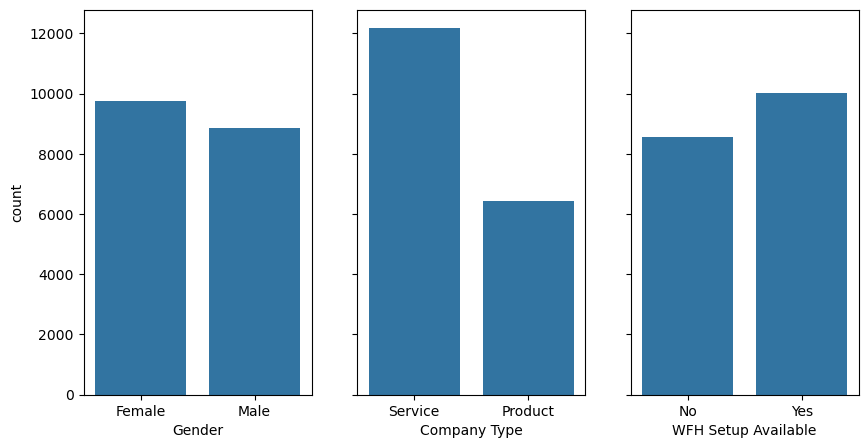

In [526]:
# Visualize categorical columns
cat_columns = data.select_dtypes(object).columns
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10, 5))
for i, c in enumerate(cat_columns):
    sns.countplot(x=c, data=data, ax=ax[i])
plt.show()


In [527]:
data.columns

Index(['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate',
       'Year of Joining', 'Month of Joining'],
      dtype='object')

In [528]:
data.shape

(18590, 9)

In [529]:
data_dummy_values = data.drop(['Designation', 'Resource Allocation', 'Mental Fatigue Score' , "Burn Rate","Year of Joining","Month of Joining" ], axis=1)
data_Not_required_dummy_values=data.drop(['Gender', 'Company Type', 'WFH Setup Available'], axis=1)

In [530]:
data_dummy_values

,Gender,Company Type,WFH Setup Available
0,Female,Service,No
1,Male,Service,Yes
3,Male,Service,Yes
4,Female,Service,No
5,Male,Product,Yes
...,...,...,...
22743,Female,Product,Yes
22744,Male,Product,No
22746,Female,Product,Yes
22748,Female,Service,No


In [531]:
data_Not_required_dummy_values

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Year of Joining,Month of Joining
0,2,3.0,3.8,0.16,2008,9
1,1,2.0,5.0,0.36,2008,11
3,1,1.0,2.6,0.20,2008,11
4,3,7.0,6.9,0.52,2008,7
5,2,4.0,3.6,0.29,2008,11
...,...,...,...,...,...,...
22743,1,3.0,6.0,0.48,2008,12
22744,3,7.0,6.2,0.54,2008,5
22746,3,6.0,6.7,0.59,2008,1
22748,2,5.0,5.9,0.52,2008,1


In [532]:

# Check if the columns exist before applying get_dummies
if all(col in data_dummy_values.columns for col in ['Company Type', 'WFH Setup Available', 'Gender']):
    data_dummy_values = pd.get_dummies(data_dummy_values, columns=['Company Type', 'WFH Setup Available', 'Gender'], drop_first=False, dtype=int)
    encoded_columns = data_dummy_values.columns
else:
    print("Error: One or more of the specified columns are not present in the DataFrame.")
    print(data_dummy_values.columns)


In [533]:
# # Initialize the OneHotEncoder
# encoder = OneHotEncoder(drop='first', dtype=int, sparse_output=False)

# # Specify the columns to be encoded
# columns_to_encode = ['Company Type', 'WFH Setup Available', 'Gender']

# # Check if the columns exist before applying OneHotEncoder
# if all(col in data_dummy_values.columns for col in columns_to_encode):
#     # Fit and transform the specified columns
#     encoded_data = encoder.fit_transform(data_dummy_values[columns_to_encode])
    
#     # Create a DataFrame with the encoded data
#     encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))
    
#     # Drop the original columns and concatenate the encoded DataFrame
#     data_dummy_values = data_dummy_values.drop(columns=columns_to_encode).reset_index(drop=True)
#     data_dummy_values = pd.concat([data_dummy_values, encoded_df], axis=1)
# else:
#     print("Error: One or more of the specified columns are not present in the DataFrame.")
#     print(data_dummy_values.columns)


In [534]:
data_dummy_values.shape

(18590, 6)

In [535]:
data_dummy_values

,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes,Gender_Female,Gender_Male
0,0,1,1,0,1,0
1,0,1,0,1,0,1
3,0,1,0,1,0,1
4,0,1,1,0,1,0
5,1,0,0,1,0,1
...,...,...,...,...,...,...
22743,1,0,0,1,1,0
22744,1,0,1,0,0,1
22746,1,0,0,1,1,0
22748,0,1,1,0,1,0


In [536]:
# Reset indices to ensure alignment
data_dummy_values.reset_index(drop=True, inplace=True)
data_Not_required_dummy_values.reset_index(drop=True, inplace=True)

In [537]:
# Concatenate X and y into a single DataFrame
data = pd.concat([data_dummy_values, data_Not_required_dummy_values], axis=1)

In [538]:
data.shape

(18590, 12)

In [539]:
data

,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes,Gender_Female,Gender_Male,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Year of Joining,Month of Joining
0,0,1,1,0,1,0,2,3.0,3.8,0.16,2008,9
1,0,1,0,1,0,1,1,2.0,5.0,0.36,2008,11
2,0,1,0,1,0,1,1,1.0,2.6,0.20,2008,11
3,0,1,1,0,1,0,3,7.0,6.9,0.52,2008,7
4,1,0,0,1,0,1,2,4.0,3.6,0.29,2008,11
...,...,...,...,...,...,...,...,...,...,...,...,...
18585,1,0,0,1,1,0,1,3.0,6.0,0.48,2008,12
18586,1,0,1,0,0,1,3,7.0,6.2,0.54,2008,5
18587,1,0,0,1,1,0,3,6.0,6.7,0.59,2008,1
18588,0,1,1,0,1,0,2,5.0,5.9,0.52,2008,1


In [540]:
data.head(15)

,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes,Gender_Female,Gender_Male,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Year of Joining,Month of Joining
0,0,1,1,0,1,0,2,3.0,3.8,0.16,2008,9
1,0,1,0,1,0,1,1,2.0,5.0,0.36,2008,11
2,0,1,0,1,0,1,1,1.0,2.6,0.20,2008,11
3,0,1,1,0,1,0,3,7.0,6.9,0.52,2008,7
4,1,0,0,1,0,1,2,4.0,3.6,0.29,2008,11
5,0,1,1,0,1,0,3,6.0,7.9,0.62,2008,1
6,0,1,0,1,1,0,2,4.0,4.4,0.33,2008,10
7,1,0,0,1,0,1,2,3.0,5.3,0.50,2008,3
8,0,1,0,1,0,1,0,1.0,1.8,0.12,2008,5
9,1,0,0,1,0,1,1,3.0,5.8,0.51,2008,5


In [541]:
data.columns

Index(['Company Type_Product', 'Company Type_Service',
       'WFH Setup Available_No', 'WFH Setup Available_Yes', 'Gender_Female',
       'Gender_Male', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate', 'Year of Joining',
       'Month of Joining'],
      dtype='object')

In [542]:
data.isnull().sum()

Company Type_Product       0
Company Type_Service       0
WFH Setup Available_No     0
WFH Setup Available_Yes    0
Gender_Female              0
Gender_Male                0
Designation                0
Resource Allocation        0
Mental Fatigue Score       0
Burn Rate                  0
Year of Joining            0
Month of Joining           0
dtype: int64

In [543]:
data.columns

Index(['Company Type_Product', 'Company Type_Service',
       'WFH Setup Available_No', 'WFH Setup Available_Yes', 'Gender_Female',
       'Gender_Male', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate', 'Year of Joining',
       'Month of Joining'],
      dtype='object')

In [544]:

# Multiply specified columns by 2 and create a new column with the sum values
columns_to_sum = ['Company Type_Product', 'Company Type_Service',
       'WFH Setup Available_No', 'WFH Setup Available_Yes', 'Gender_Female',
       'Gender_Male', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score']
data['Sum_Column'] = data[columns_to_sum].apply(lambda x: x * 2).sum(axis=1)


In [545]:
data.isnull().sum()

Company Type_Product       0
Company Type_Service       0
WFH Setup Available_No     0
WFH Setup Available_Yes    0
Gender_Female              0
Gender_Male                0
Designation                0
Resource Allocation        0
Mental Fatigue Score       0
Burn Rate                  0
Year of Joining            0
Month of Joining           0
Sum_Column                 0
dtype: int64

In [546]:
# Split data into X and y
y = data['Burn Rate']
X = data.drop('Burn Rate', axis=1)

In [547]:

# Feature Engineering: Interaction and Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(X[columns_to_sum])
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(columns_to_sum))
X = pd.concat([X, poly_features_df], axis=1)



In [548]:
X.head(15)

,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes,Gender_Female,Gender_Male,Designation,Resource Allocation,Mental Fatigue Score,Year of Joining,...,Gender_Female Gender_Male,Gender_Female Designation,Gender_Female Resource Allocation,Gender_Female Mental Fatigue Score,Gender_Male Designation,Gender_Male Resource Allocation,Gender_Male Mental Fatigue Score,Designation Resource Allocation,Designation Mental Fatigue Score,Resource Allocation Mental Fatigue Score
0,0,1,1,0,1,0,2,3.0,3.8,2008,...,0.0,2.0,3.0,3.8,0.0,0.0,0.0,6.0,7.6,11.4
1,0,1,0,1,0,1,1,2.0,5.0,2008,...,0.0,0.0,0.0,0.0,1.0,2.0,5.0,2.0,5.0,10.0
2,0,1,0,1,0,1,1,1.0,2.6,2008,...,0.0,0.0,0.0,0.0,1.0,1.0,2.6,1.0,2.6,2.6
3,0,1,1,0,1,0,3,7.0,6.9,2008,...,0.0,3.0,7.0,6.9,0.0,0.0,0.0,21.0,20.7,48.3
4,1,0,0,1,0,1,2,4.0,3.6,2008,...,0.0,0.0,0.0,0.0,2.0,4.0,3.6,8.0,7.2,14.4
5,0,1,1,0,1,0,3,6.0,7.9,2008,...,0.0,3.0,6.0,7.9,0.0,0.0,0.0,18.0,23.7,47.4
6,0,1,0,1,1,0,2,4.0,4.4,2008,...,0.0,2.0,4.0,4.4,0.0,0.0,0.0,8.0,8.8,17.6
7,1,0,0,1,0,1,2,3.0,5.3,2008,...,0.0,0.0,0.0,0.0,2.0,3.0,5.3,6.0,10.6,15.9
8,0,1,0,1,0,1,0,1.0,1.8,2008,...,0.0,0.0,0.0,0.0,0.0,1.0,1.8,0.0,0.0,1.8
9,1,0,0,1,0,1,1,3.0,5.8,2008,...,0.0,0.0,0.0,0.0,1.0,3.0,5.8,3.0,5.8,17.4


In [549]:
X.columns

Index(['Company Type_Product', 'Company Type_Service',
       'WFH Setup Available_No', 'WFH Setup Available_Yes', 'Gender_Female',
       'Gender_Male', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Year of Joining', 'Month of Joining',
       'Sum_Column', 'Company Type_Product', 'Company Type_Service',
       'WFH Setup Available_No', 'WFH Setup Available_Yes', 'Gender_Female',
       'Gender_Male', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Company Type_Product Company Type_Service',
       'Company Type_Product WFH Setup Available_No',
       'Company Type_Product WFH Setup Available_Yes',
       'Company Type_Product Gender_Female',
       'Company Type_Product Gender_Male', 'Company Type_Product Designation',
       'Company Type_Product Resource Allocation',
       'Company Type_Product Mental Fatigue Score',
       'Company Type_Service WFH Setup Available_No',
       'Company Type_Service WFH Setup Available_Yes',
       'Com

In [550]:
X.isnull().sum()

Company Type_Product                              0
Company Type_Service                              0
WFH Setup Available_No                            0
WFH Setup Available_Yes                           0
Gender_Female                                     0
Gender_Male                                       0
Designation                                       0
Resource Allocation                               0
Mental Fatigue Score                              0
Year of Joining                                   0
Month of Joining                                  0
Sum_Column                                        0
Company Type_Product                              0
Company Type_Service                              0
WFH Setup Available_No                            0
WFH Setup Available_Yes                           0
Gender_Female                                     0
Gender_Male                                       0
Designation                                       0
Resource All

In [551]:
# Concatenate X and y into a single DataFrame
data = pd.concat([X, y], axis=1)

# Drop rows where any column in X has a null value
data_cleaned = data.dropna(subset=X.columns)


In [552]:
data_cleaned.corr(numeric_only=True)['Burn Rate'][:]

Company Type_Product                             -0.005904
Company Type_Service                              0.005904
WFH Setup Available_No                            0.307168
WFH Setup Available_Yes                          -0.307168
Gender_Female                                    -0.156577
Gender_Male                                       0.156577
Designation                                       0.736412
Resource Allocation                               0.855005
Mental Fatigue Score                              0.944389
Year of Joining                                        NaN
Month of Joining                                  0.000342
Sum_Column                                        0.926596
Company Type_Product                             -0.005904
Company Type_Service                              0.005904
WFH Setup Available_No                            0.307168
WFH Setup Available_Yes                          -0.307168
Gender_Female                                    -0.1565

In [553]:

# Drop the duplicate column by index
data_cleaned = data_cleaned.loc[:, ~data_cleaned.columns.duplicated()]

# Verify the result
print(data_cleaned.columns)

Index(['Company Type_Product', 'Company Type_Service',
       'WFH Setup Available_No', 'WFH Setup Available_Yes', 'Gender_Female',
       'Gender_Male', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Year of Joining', 'Month of Joining',
       'Sum_Column', 'Company Type_Product Company Type_Service',
       'Company Type_Product WFH Setup Available_No',
       'Company Type_Product WFH Setup Available_Yes',
       'Company Type_Product Gender_Female',
       'Company Type_Product Gender_Male', 'Company Type_Product Designation',
       'Company Type_Product Resource Allocation',
       'Company Type_Product Mental Fatigue Score',
       'Company Type_Service WFH Setup Available_No',
       'Company Type_Service WFH Setup Available_Yes',
       'Company Type_Service Gender_Female',
       'Company Type_Service Gender_Male', 'Company Type_Service Designation',
       'Company Type_Service Resource Allocation',
       'Company Type_Service Mental Fatigue Score',


In [554]:
data_cleaned.corr(numeric_only=True)['Burn Rate'][:]

Company Type_Product                             -0.005904
Company Type_Service                              0.005904
WFH Setup Available_No                            0.307168
WFH Setup Available_Yes                          -0.307168
Gender_Female                                    -0.156577
Gender_Male                                       0.156577
Designation                                       0.736412
Resource Allocation                               0.855005
Mental Fatigue Score                              0.944389
Year of Joining                                        NaN
Month of Joining                                  0.000342
Sum_Column                                        0.926596
Company Type_Product Company Type_Service              NaN
Company Type_Product WFH Setup Available_No       0.148187
Company Type_Product WFH Setup Available_Yes     -0.146266
Company Type_Product Gender_Female               -0.071590
Company Type_Product Gender_Male                  0.0661

In [504]:
data_cleaned = data_cleaned.drop([ 'Company Type_Product', 'WFH Setup Available_Yes',
        'Gender_Female','Designation Mental Fatigue Score','Designation Gender_Male',
                                  'Resource Allocation Mental Fatigue Score','Resource Allocation Gender_Male',
                                  'Mental Fatigue Score Company Type_Service','Mental Fatigue Score Gender_Male','Company Type_Service Gender_Male',
                                  'WFH Setup Available_Yes Gender_Male'
       ], axis=1)

In [555]:
data_cleaned.corr(numeric_only=True)['Burn Rate'][:]

Company Type_Product                             -0.005904
Company Type_Service                              0.005904
WFH Setup Available_No                            0.307168
WFH Setup Available_Yes                          -0.307168
Gender_Female                                    -0.156577
Gender_Male                                       0.156577
Designation                                       0.736412
Resource Allocation                               0.855005
Mental Fatigue Score                              0.944389
Year of Joining                                        NaN
Month of Joining                                  0.000342
Sum_Column                                        0.926596
Company Type_Product Company Type_Service              NaN
Company Type_Product WFH Setup Available_No       0.148187
Company Type_Product WFH Setup Available_Yes     -0.146266
Company Type_Product Gender_Female               -0.071590
Company Type_Product Gender_Male                  0.0661

In [556]:
data_cleaned=data_cleaned.drop(['Year of Joining','Month of Joining'],axis=1)

In [557]:
# Split data into X and y
y = data_cleaned['Burn Rate']
X = data_cleaned.drop('Burn Rate', axis=1)

In [558]:
y.shape

(18590,)

In [559]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)



In [560]:
X_train.isnull().sum()

Company Type_Product                              0
Company Type_Service                              0
WFH Setup Available_No                            0
WFH Setup Available_Yes                           0
Gender_Female                                     0
Gender_Male                                       0
Designation                                       0
Resource Allocation                               0
Mental Fatigue Score                              0
Sum_Column                                        0
Company Type_Product Company Type_Service         0
Company Type_Product WFH Setup Available_No       0
Company Type_Product WFH Setup Available_Yes      0
Company Type_Product Gender_Female                0
Company Type_Product Gender_Male                  0
Company Type_Product Designation                  0
Company Type_Product Resource Allocation          0
Company Type_Product Mental Fatigue Score         0
Company Type_Service WFH Setup Available_No       0
Company Type

In [561]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)


In [562]:

# Save the scaler
scaler_filename = './models/scaler.pkl'
os.makedirs(os.path.dirname(scaler_filename), exist_ok=True)
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Save the processed data
path = './data/processed/'
os.makedirs(path, exist_ok=True)
X_train.to_csv(path + 'X_train_processed.csv', index=False)
y_train.to_csv(path + 'y_train_processed.csv', index=False)

# Create and train the linear regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)


LinearRegression()

In [563]:

# Linear Regression Model Performance Metrics
print("Linear Regression Model Performance Metrics:\n")
y_pred = linear_regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


Linear Regression Model Performance Metrics:

Mean Squared Error: 0.00298803230487601
Root Mean Squared Error: 0.054662896967467886
Mean Absolute Error: 0.04490494513040016
R-squared Score: 0.9231668771264571


C:\Users\shanm\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [564]:
import joblib
joblib.dump(linear_regression_model, 'Burnout_prediction_model.pkl')

['Burnout_prediction_model.pkl']